In [1]:
import itertools
import numpy as np
import torch

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from bayesian_privacy_accountant import BayesianPrivacyAccountant
from wasserstein_privacy_accountant import WassersteinPrivacyAccountant

In [2]:
def compute_privacy(wasserstein_distance, delta, beta):
    epsilon = wasserstein_distance - ((1/beta) * np.log(delta))
    return epsilon

In [3]:
beta_array = np.arange(1,51)
wa_eps_6 = []
wa_eps_5 = []
wa_eps_4 = []
wa_eps_3 = []

for beta in beta_array:
    privacy = compute_privacy(wasserstein_distance=1e1,
                    delta=1e-10,
                    beta=beta
                   )
    wa_eps_6.append(privacy)
    
    privacy = compute_privacy(wasserstein_distance=1e1,
                    delta=1e-8,
                    beta=beta
                   )
    wa_eps_5.append(privacy)
    
    privacy = compute_privacy(wasserstein_distance=1e1,
                    delta=1e-5,
                    beta=beta
                   )
    wa_eps_4.append(privacy)
    
    privacy = compute_privacy(wasserstein_distance=1e1,
                    delta=1e-3,
                    beta=beta
                   )
    wa_eps_3.append(privacy)

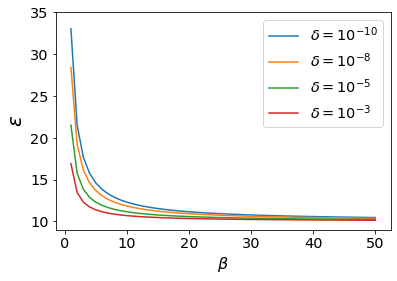

In [4]:
# plt.plot(plot_range, ma_eps, '--', label='CDP')
# plt.plot(plot_range, ba_eps, '--', label='BDP')
plt.plot(beta_array, wa_eps_6, label='$\delta=10^{-10}$')
plt.plot(beta_array, wa_eps_5, label='$\delta=10^{-8}$')
plt.plot(beta_array, wa_eps_4, label='$\delta=10^{-5}$')
plt.plot(beta_array, wa_eps_3, label='$\delta=10^{-3}$')
plt.xlabel(r'$\beta$', fontsize=16)
plt.ylabel(r'$\varepsilon$', fontsize=20)
plt.xticks(fontsize=14.5)
plt.yticks(fontsize=14.5)
# plt.yscale('log')
plt.ylim(top=35)
plt.legend(fontsize=14.5)
#plt.title(r'Privacy loss evolution, $C={:.2f}$-quantile, no clipping'.format(quant), fontsize=12)
# plt.savefig('eps_step_{}q_noclip.pdf'.format(int(quant*100)), format='pdf', bbox_inches='tight')

In [5]:
delta_array=np.arange(1e-10,1e-5,1e-8)
wa_eps_1 = []
wa_eps_2 = []
wa_eps_5 = []
wa_eps_10 = []

for delta in delta_array:
    privacy = compute_privacy(wasserstein_distance=1e1,
                    delta=delta,
                    beta=1
                   )
    wa_eps_1.append(privacy)
    
    privacy = compute_privacy(wasserstein_distance=1e1,
                    delta=delta,
                    beta=2
                   )
    wa_eps_2.append(privacy)
    
    privacy = compute_privacy(wasserstein_distance=1e1,
                    delta=delta,
                    beta=5
                   )
    wa_eps_5.append(privacy)
    
    privacy = compute_privacy(wasserstein_distance=1e1,
                    delta=delta,
                    beta=10
                   )
    wa_eps_10.append(privacy)

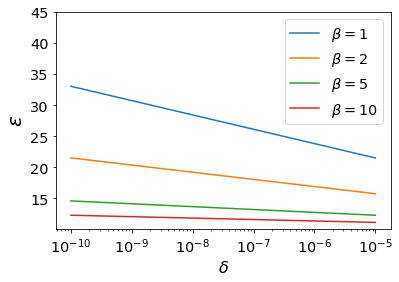

In [6]:
# plt.plot(plot_range, ma_eps, '--', label='CDP')
# plt.plot(plot_range, ba_eps, '--', label='BDP')
plt.plot(delta_array, wa_eps_1, label=r'$\beta=1$')
plt.plot(delta_array, wa_eps_2, label=r'$\beta=2$')
plt.plot(delta_array, wa_eps_5, label=r'$\beta=5$')
plt.plot(delta_array, wa_eps_10, label=r'$\beta=10$')
plt.xlabel(r'$\delta$', fontsize=16)
plt.ylabel(r'$\epsilon$', fontsize=20)
plt.xticks(fontsize=14.5)
plt.yticks(fontsize=14.5)
plt.xscale('log')
plt.ylim(top=45)
plt.legend(fontsize=14.5, loc=1)
#plt.title(r'Privacy loss evolution, $C={:.2f}$-quantile, no clipping'.format(quant), fontsize=12)
# plt.savefig('eps_step_{}q_noclip.pdf'.format(int(quant*100)), format='pdf', bbox_inches='tight')